# **Session 21: Simple RNN for text classification**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

The bulk of this code is developed by Francois Chollet, Deep Learning with Python. https://github.com/fchollet/deep-learning-with-python-notebooks  The code is modified by me for Applied AI class - Behnam Kia

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(64, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 8s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6453 - acc: 0.6114 - val_loss: 0.6067 - val_acc: 0.6528
Epoch 2/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.4075 - acc: 0.8262 - val_loss: 0.4346 - val_acc: 0.7986
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.3228 - acc: 0.8720 - val_loss: 0.4061 - val_acc: 0.8202
Epoch 4/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.2464 - acc: 0.9064 - val_loss: 0.3798 - val_acc: 0.8476
Epoch 5/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.1845 - acc: 0.9297 - val_loss: 0.3615 - val_acc: 0.8656
Epoch 6/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1142 - acc: 0.9606 - val_loss: 0.4147 - val_acc: 0.8442
Epoch 7/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.0708 - acc: 0.9787 - val_loss: 0.5113 - val_acc:

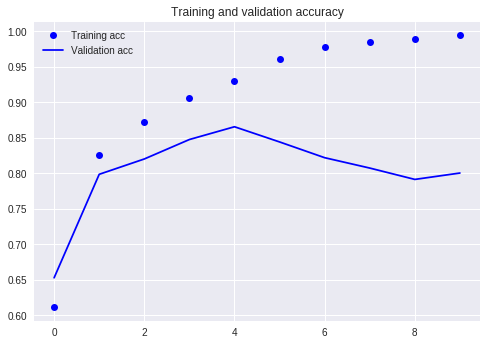

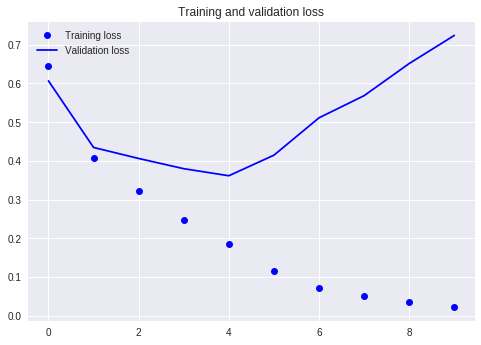

In [ ]:


import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 137s 7ms/step - loss: 0.6307 - acc: 0.6203 - val_loss: 0.4788 - val_acc: 0.7692
Epoch 2/10
20000/20000 [==============================] - 136s 7ms/step - loss: 0.3656 - acc: 0.8430 - val_loss: 0.3931 - val_acc: 0.8254
Epoch 3/10
20000/20000 [==============================] - 136s 7ms/step - loss: 0.2810 - acc: 0.8877 - val_loss: 0.4058 - val_acc: 0.8166
Epoch 4/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.1718 - acc: 0.9360 - val_loss: 0.4285 - val_acc: 0.8572
Epoch 5/10
20000/20000 [==============================] - 134s 7ms/step - loss: 0.0992 - acc: 0.9669 - val_loss: 0.6772 - val_acc: 0.7642
Epoch 6/10
20000/20000 [==============================] - 134s 7ms/step - loss: 0.0480 - acc: 0.9838 - val_loss: 0.6268 - val_acc: 0.8484
Epoch 7/10
20000/20000 [==============================] - 134s 7ms/step - loss: 0.0278 - acc: 0.9909 - val_loss: 0.7891 - v

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 344,897
Trainable params: 344,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 186s 9ms/step - loss: 0.5168 - acc: 0.7546 - val_loss: 0.4103 - val_acc: 0.8282
Epoch 2/10
20000/20000 [==============================] - 185s 9ms/step - loss: 0.2945 - acc: 0.8853 - val_loss: 0.4086 - val_acc: 0.8206
Epoch 3/10
20000/20000 [==============================] - 184s 9ms/step - loss: 0.2329 - acc: 0.9132 - val_loss: 0.2830 - val_acc: 0.8848
Epoch 4/10
20000/20000 [==============================] - 185s 9ms/step - loss: 0.1972 - acc: 0.9281 - val_loss: 0.3062 - val_acc: 0.8778
Epoch 5/10
20000/20000 [==============================] - 185s 9ms/step - loss: 0.1747 - acc: 0.9373 - val_loss: 0.3532 - val_acc: 0.8510
Epoch 6/10
20000/20000 [==============================] - 185s 9ms/step - loss: 0.1610 - acc: 0.9412 - val_loss: 0.3012 - val_acc: 0.8878
Epoch 7/10
20000/20000 [==============================] - 185s 9ms/step - loss: 0.1399 - acc: 0.9507 - val_loss: 0.3247 - v

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 338,689
Trainable params: 338,689
Non-trainable params: 0
_________________________________________________________________


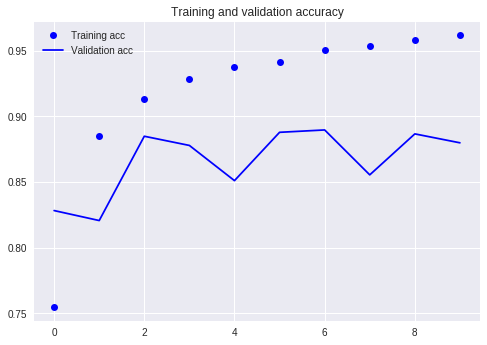

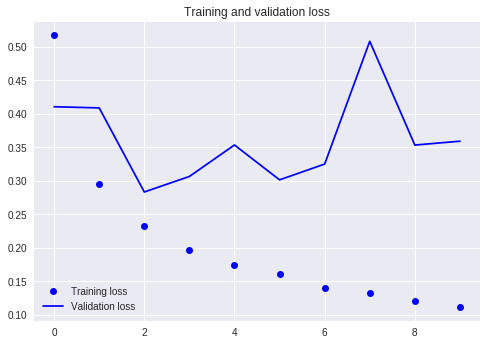

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()